# The paper that describes this data set is on EarthArXiv:
#   https://eartharxiv.org/2em53/

### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy.stats import skew
from scipy.stats import kurtosis
import scipy.stats as stats
import math

### locate the data

In [2]:
dataDir = './data/'
dataName = 'camels_all_coding_workshop.csv'
dataLoc = dataDir + dataName

### load the data with pandas

In [3]:
pd_data = pd.read_csv(dataLoc, sep=',', index_col='gauge_id')

### load the data with numpy

In [4]:
np_data = np.genfromtxt(dataLoc, dtype=None, delimiter=',', skip_header=1)
np_data=np.array(pd_data)

In [5]:
pd_data.head(10)

,q_mean,runoff_ratio,slope_fdc,baseflow_index,stream_elas,q5,q95,high_q_freq,high_q_dur,low_q_freq,...,water_frac,organic_frac,other_frac,frac_forest,lai_max,gvf_max,dom_land_cover_frac,dom_land_cover,root_depth_50,root_depth_99
gauge_id,,,,,,,,,,,,,,,,,,,,,
1013500,1.699155,0.543437,1.528219,0.585226,1.845324,0.241106,6.373021,6.10,8.714286,41.35,...,5.376698,0.408717,0.000000,0.9063,4.167304,0.804567,0.883452,1,NaN,NaN
1022500,2.173062,0.602269,1.776280,0.554478,1.702782,0.204734,7.123049,3.90,2.294118,65.15,...,1.226913,0.000000,0.358472,0.9232,4.871392,0.863936,0.820493,1,0.237435,2.238444
1030500,1.820108,0.555859,1.871110,0.508441,1.377505,0.107149,6.854887,12.25,7.205882,89.25,...,1.634345,1.330278,0.022016,0.8782,4.685200,0.858502,0.975258,1,NaN,NaN
1031500,2.030242,0.576289,1.494019,0.445091,1.648693,0.111345,8.010503,18.90,3.286957,94.80,...,0.674594,0.000000,0.000000,0.9548,4.903259,0.870668,1.000000,1,0.250000,2.400000
1047000,2.182870,0.656868,1.415939,0.473465,1.510238,0.196458,8.095148,14.95,2.577586,71.55,...,0.000000,0.000000,0.147867,0.9906,5.086811,0.891383,0.850450,1,0.241027,2.340180
1052500,2.405105,0.644652,1.301062,0.459700,1.025555,0.305965,8.669019,14.10,2.517857,58.90,...,0.000000,0.000000,5.675527,1.0000,4.800830,0.880034,0.593588,1,0.225615,2.237435
1054200,2.731742,0.671663,1.319645,0.437050,1.357808,0.256851,10.095605,16.05,1.888235,82.20,...,0.000000,0.000000,0.000000,1.0000,5.019827,0.886711,0.580954,1,0.224857,2.232382
1055000,2.279897,0.652484,1.349312,0.438132,1.366587,0.185465,8.441584,16.25,2.056962,83.60,...,0.000000,0.000000,0.778016,0.9916,5.030033,0.886163,0.524249,1,0.221455,2.209700
1057000,1.823551,0.510727,1.533232,0.474677,1.280681,0.078169,6.866097,13.85,2.429825,82.95,...,0.000000,0.000000,0.000000,0.9415,5.362949,0.905510,0.532781,2,0.209186,2.073141


In [6]:
print(np_data)

[[ 1.699155  0.543437  1.528219 ...  1.             nan       nan]
 [ 2.173062  0.602269  1.77628  ...  1.        0.237435  2.238444]
 [ 1.820108  0.555859  1.87111  ...  1.             nan       nan]
 ...
 [ 4.072283  0.646657  2.246135 ... 11.        0.170186  1.801394]
 [ 0.332015  0.119358  1.18604  ... 11.        0.17      1.8     ]
 [ 7.568103  1.362132  2.017435 ... 11.        0.17      1.8     ]]


### Remove any rows with nan

In [7]:
pd_data = pd_data.dropna()

### data dimensions

In [8]:
[N,D] = pd_data.shape

### separate attributes from signatures

In [9]:
pd_signatures = pd_data[pd_data.columns[0:12]]
pd_attributes = pd_data[pd_data.columns[13:50]]
pd_sig_names = pd_signatures.columns.values
pd_att_names = pd_attributes.columns.values
print(pd_att_names)
print(pd_sig_names)

['geol_1st_class' 'glim_1st_class_frac' 'carbonate_rocks_frac'
 'geol_porostiy' 'geol_permeability' 'p_mean' 'pet_mean' 'p_seasonality'
 'frac_snow' 'aridity' 'high_prec_freq' 'high_prec_dur' 'high_prec_timing'
 'low_prec_freq' 'low_prec_dur' 'low_prec_timing' 'gauge_lat' 'gauge_lon'
 'elev_mean' 'area_gages2' 'area_geospa_fabric' 'soil_depth_pelletier'
 'soil_depth_statsgo' 'max_water_content' 'sand_frac' 'silt_frac'
 'clay_frac' 'water_frac' 'organic_frac' 'other_frac' 'frac_forest'
 'lai_max' 'gvf_max' 'dom_land_cover_frac' 'dom_land_cover'
 'root_depth_50' 'root_depth_99']
['q_mean' 'runoff_ratio' 'slope_fdc' 'baseflow_index' 'stream_elas' 'q5'
 'q95' 'high_q_freq' 'high_q_dur' 'low_q_freq' 'low_q_dur' 'zero_q_freq']


### extract data from tables

In [10]:
np_data = np.array(pd_data)

### Isolate attributes and signatures

In [11]:
np_attributes = np.array(pd_attributes)
np_signatures = np.array(pd_signatures)

### Save dimension of attributes and signatures

In [12]:
[Natt, Datt] = np_attributes.shape
[Nsig, Dsig] = np_signatures.shape

In [13]:
type(np_signatures.shape)

tuple

# Homework Question A 
## What are the three largest absolute-value correlations between individual catchment attributes and hydrologic signatures? 
## Do these correlations seem reasonable?

In [14]:
CorrCoef=[]
Attribute=[]
Signature=[]
for A in range(0, Datt):
    for S in range(0, Dsig):
        Attribute.append(pd_att_names[A])
        Signature.append(pd_sig_names[S])
        CorrCoef.append(abs(np.corrcoef(np_attributes[:,A], np_signatures[:,S])[0,1]))
CorrCoefs = pd.DataFrame(list(zip(CorrCoef, Attribute, Signature)), columns=['C','A','S'])
print(CorrCoefs.head(30))
CorrCoefs = CorrCoefs.sort_values(by=['C'], ascending=False)
print('correlation value, catchment attribute, hydrologic signature')
print(CorrCoefs.head(3))

           C                     A               S
0   0.135579        geol_1st_class          q_mean
1   0.203919        geol_1st_class    runoff_ratio
2   0.201822        geol_1st_class       slope_fdc
3   0.038372        geol_1st_class  baseflow_index
4   0.124543        geol_1st_class     stream_elas
5   0.016879        geol_1st_class              q5
6   0.147823        geol_1st_class             q95
7   0.061223        geol_1st_class     high_q_freq
8   0.102845        geol_1st_class      high_q_dur
9   0.049864        geol_1st_class      low_q_freq
10  0.058939        geol_1st_class       low_q_dur
11  0.002871        geol_1st_class     zero_q_freq
12  0.005035   glim_1st_class_frac          q_mean
13  0.047780   glim_1st_class_frac    runoff_ratio
14  0.107753   glim_1st_class_frac       slope_fdc
15  0.125819   glim_1st_class_frac  baseflow_index
16  0.042066   glim_1st_class_frac     stream_elas
17  0.082463   glim_1st_class_frac              q5
18  0.011931   glim_1st_class_f

/home/jmframe/programs/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/jmframe/programs/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


# Homework Question B  
## Calculate the mean, standard deviation, skewness and kurtosis of all variables involved in these three corrs. Generating Statistics for all variables involved in these three  correlations: "p_mean", "q_mean", "low_prec_freq", "high_prec_freq", "runoff_ratio"

In [15]:
hiCorVars = ['q_mean','p_mean', 'runoff_ratio', 'low_prec_freq', 'q95']
for var in hiCorVars:
    m = np.average(np.array(pd_data[var]))
    st = np.std(np.array(pd_data[var]))
    sk = skew(np.array(pd_data[var]))
    k = kurtosis(np.array(pd_data[var]))
    print('Stats for ' + str(var))
    print('Average = ' + str(round(m, 2)))
    print('Standard deviation = ' + str(round(st, 2)))
    print('Skewness = ' + str(round(sk, 2)))
    print('Kurtosis = ' + str(round(k, 2)))
    print('\n')

Stats for q_mean
Average = 1.45
Standard deviation = 1.47
Skewness = 2.47
Kurtosis = 7.08


Stats for p_mean
Average = 3.24
Standard deviation = 1.38
Skewness = 1.14
Kurtosis = 2.27


Stats for runoff_ratio
Average = 0.38
Standard deviation = 0.23
Skewness = 0.86
Kurtosis = 1.06


Stats for low_prec_freq
Average = 255.44
Standard deviation = 34.71
Skewness = -0.16
Kurtosis = -0.34


Stats for q95
Average = 4.92
Standard deviation = 4.77
Skewness = 2.28
Kurtosis = 6.36




### Plot the histograms of all variables involved in these correlations.

In [16]:
n_bins = 100

### We can set the number of bins with the `bins` kwarg

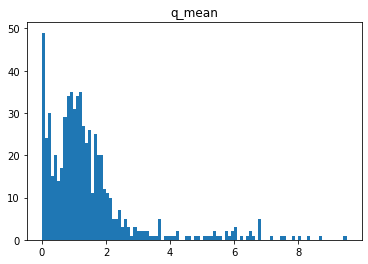

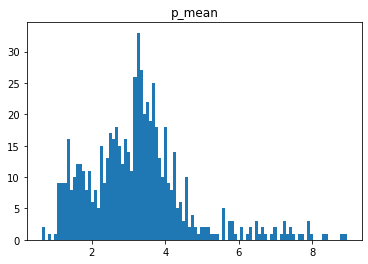

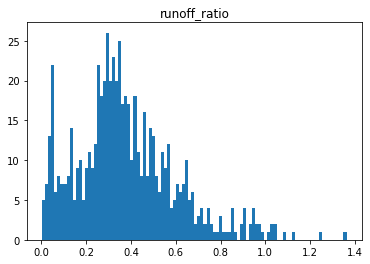

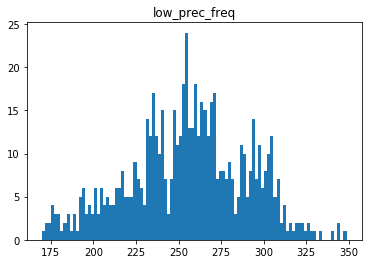

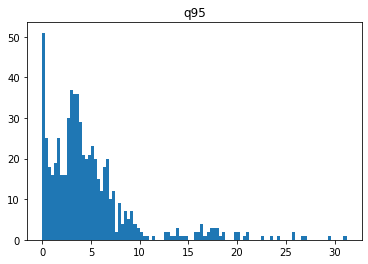

In [17]:
for var in hiCorVars:
    fig, axs = plt.subplots()
    axs.hist(pd_data[var], bins=n_bins)
    axs.set_title(var)

### Plot heat maps or contour plots of the joint distributions in all three of these correlations.

In [18]:
cp = [['p_mean', 'q_mean'],
['p_mean', 'q95'],
['low_prec_freq', 'runoff_ratio']]

### loop through and plot contour maps for each correlation pair

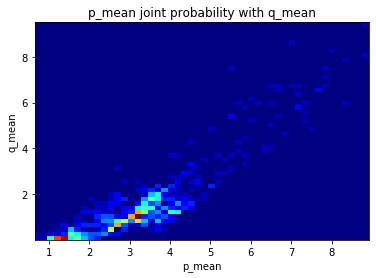

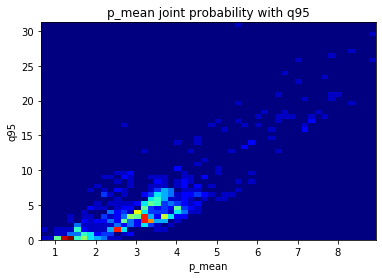

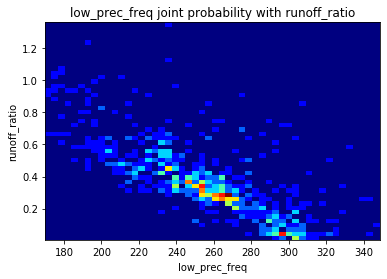

In [19]:
for i in range(0,3):
    x = pd_data[cp[i][0]]
    y = pd_data[cp[i][1]]
    fig, axs = plt.subplots()
    axs.hist2d(x, y, bins=(50, 50), cmap=plt.cm.jet)
    axs.set_title(cp[i][0] + ' joint probability with ' + cp[i][1])
    axs.set_xlabel(cp[i][0])
    axs.set_ylabel(cp[i][1])

### Use random sampling to sample 50 catchments from the list and calculate the sample mean and 90% confidence intervals of the sample mean for the variable <runoff_ratio>. Plot the distribution of the sample mean against the actual mean from all 671 catchments

In [20]:
d = np.array(pd_data['q95'])

### get the statistics for all the runoff ratios

In [21]:
dStats = [np.average(d), np.std(d), skew(d), kurtosis(d), np.var(d)]

In [22]:
K = 50

### get 50 random index values

In [23]:
iRandom = np.random.choice(Nsig,K)

### grab the runoff ratio of the random index catchments

In [24]:
dRan = d[iRandom]
dRanStats = [np.average(dRan), np.std(dRan), skew(dRan), kurtosis(dRan), np.var(dRan)]

In [25]:
confidence = 0.9
n = len(dRan)
se = stats.sem(dRan)
m = np.mean(dRan)
h = se * stats.t.ppf((1 + confidence) / 2., n-1)
print('Lower 90% CI', m-h)
print('Sample mean', m)
print('Upper 90% CI', m+h)

Lower 90% CI 3.893517177052701
Sample mean 5.08159996
Upper 90% CI 6.2696827429473


### Generate normal distribution based on the statistics

In [26]:
x = np.linspace(dStats[0] - 4*dStats[1], dStats[0] + 4*dStats[1], 10000)
x_ran = np.linspace(dRanStats[0] - 4*dRanStats[1], dRanStats[0] + 4*dRanStats[1], 10000)

### Probability distribution function

In [27]:
y = stats.norm.pdf(x, dStats[0], dStats[1])
y_ran = stats.norm.pdf(x_ran, dRanStats[0], dRanStats[1])

### Normalize the distribution function

In [28]:
y_n = y/np.sum(y)/np.sqrt(643)
y_nRan = y_ran/np.sum(y_ran)/np.sqrt(K)

### Plot the distribution

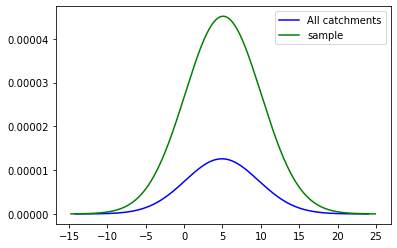

In [29]:
fig, axs = plt.subplots()
axs.plot(x, y_n, c='blue', label="All catchments")
axs.plot(x_ran, y_nRan, c='green', label="sample")
axs.legend()

### Use stratified sampling Agaist geological class

In [30]:
stratData = np.array(pd_data['geol_1st_class'])

### Define unique values of strata

In [31]:
uv = set(stratData)
Nstrata = len(uv) # number of unique strata values
print(uv)

{1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 13, 14}


### Calculate statistics by strata

In [32]:
pd_StratDat = pd.DataFrame(data=np.zeros([Nstrata, 3]), index=uv, columns=['N', 'Std', 'Ave'])
iStrat = dict.fromkeys(uv)
for i in uv:
    # Number of values in each stratum
    pd_StratDat['N'].loc[i] = list(stratData).count(i)
    # index of the stratification values
    iStrat[i] = [j for j in range(Natt) if stratData[j] == i]
    # Standard deviation of each strata
    pd_StratDat['Std'].loc[i] = np.std(d[iStrat[i]])
    # Average of each strata
    pd_StratDat['Ave'].loc[i] = np.average(d[iStrat[i]])
pd_StratDat

,N,Std,Ave
1,220.0,4.832061,5.367283
2,41.0,5.721028,6.934875
3,99.0,3.274246,4.842852
4,80.0,2.161259,3.082416
5,37.0,8.329144,12.080036
7,121.0,2.851318,3.147415
8,25.0,2.198420,2.992903
9,1.0,0.000000,9.953948
10,2.0,1.218359,7.875361
11,12.0,1.736120,2.297794


In [33]:
print(np.std(d))

4.774120262596036


### Calculate the sum of the product between the stratum N & std

In [34]:
sumSknk = np.dot(np.array(pd_StratDat['N']), np.array(pd_StratDat['Std']))

### calulate strat-sampling statististics this loop generates a table of statistics for the strata

In [35]:
c=['stratum', 'nOPT', 'stratSampleMean', 'Nkzhat', 'sk2', 'sh']
pd_SampleStratDat = pd.DataFrame(data=np.zeros([Nstrata, 6]), index=uv, columns=c)
for i in uv: 
    #  index of the stratification values
    iStrat[i]
    #  Choose optimal stratum sample
    nOPT = int(round(K * (pd_StratDat['N'].loc[i] * pd_StratDat['Std'].loc[i]) / sumSknk))
    # THRESHOLD for using a sample size
    if nOPT < 4:
        nOPT = 0
    #  generating a random sample within the strata
    iStratSample = np.random.choice(iStrat[i],nOPT)
    
    # {\displaystyle s_{h}=} sample standard deviation of stratum {\displaystyle h}h
    sh_value = np.std(d[iStratSample])
    
    #  collect the values from our stratum sample
    stratSample = d[iStratSample]
    #   CALCULATE THE SAMPLE MEAN
    stratSampleMean =  np.average(stratSample)
    #   Calculate the sum-product of the sample mean & stratum size
    Nkzhat = stratSampleMean * pd_StratDat['N'].loc[i]
    # Calculate the within-stratum sample variance
    sk2 = 1/(nOPT - 1) * np.sum(np.square(stratSample - pd_StratDat['Ave'].loc[i]))
    # stratified sample statistics
    pd_SampleStratDat.loc[i] = [i, nOPT, stratSampleMean, Nkzhat, sk2, sh_value]
pd_SampleStratDat

/home/jmframe/programs/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/jmframe/programs/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/jmframe/programs/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jmframe/programs/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:393: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/jmframe/programs/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,stratum,nOPT,stratSampleMean,Nkzhat,sk2,sh
1,1.0,21.0,5.416286,1191.582983,21.580037,4.533212
2,2.0,5.0,11.441694,469.109438,129.799032,9.139355
3,3.0,6.0,6.089675,602.877841,20.352203,3.924997
4,4.0,0.0,NaN,NaN,-0.000000,NaN
5,5.0,6.0,10.379309,384.034433,60.160287,6.873216
7,7.0,7.0,3.868793,468.123970,4.251871,1.767505
8,8.0,0.0,NaN,NaN,-0.000000,NaN
9,9.0,0.0,NaN,NaN,-0.000000,NaN
10,10.0,0.0,NaN,NaN,-0.000000,NaN
11,11.0,0.0,NaN,NaN,-0.000000,NaN


### Index the good stratum values

In [36]:
goodstrata=[]
for i in uv:
    if math.isnan(pd_SampleStratDat['Nkzhat'].loc[i]) is False:
        goodstrata.append(i)
print(goodstrata)

[1, 2, 3, 5, 7]


### Stratified sample mean

In [37]:
sumSkzk = sum(pd_SampleStratDat['Nkzhat'].loc[goodstrata])
Nstratstat = sum(pd_StratDat['N'].loc[goodstrata])
stratMean = sumSkzk/Nstratstat
print(stratMean)

6.014920203171538


In [38]:
stratVar = 0
for i in goodstrata:
    sk2 = pd_SampleStratDat['sh'].loc[i]
    nk = pd_SampleStratDat['nOPT'].loc[i]
    Nk = pd_StratDat['N'].loc[i]
    stratVar += (sk2/nk) * (Nk/Nstratstat)**2 * (1-nk/Nk)
print(stratVar)
stratStd = np.sqrt(stratVar)

0.085599644274686


### calcualte the relative precisions of strat sampling Relative precision = S^2(z_hat) / (S_s)^2(z_hat)

In [39]:
relativePrecision = (dRanStats[4]/K) / stratVar
print(relativePrecision)

5.749287657192554


In [40]:
confidence = 0.9
se = stratStd/np.sqrt(Nstratstat)
h = se * stats.t.ppf((1 + confidence) / 2., Nstratstat-1)
print('Lower 90% CI', stratMean-h)
print('Sample mean', stratMean)
print('Upper 90% CI', stratMean+h)

Lower 90% CI 5.99373770132996
Sample mean 6.014920203171538
Upper 90% CI 6.036102705013117


### Generate normal distribution based on the statistics

In [41]:
x_strat = np.linspace(stratMean - 4*stratStd, stratMean + 4*stratStd, 100)
y_strat = stats.norm.pdf(x_strat, stratMean, stratStd)
y_nStrat = y_strat/np.sum(y_strat)

### Plot the distribution

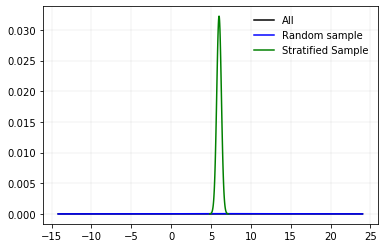

In [51]:
fig, axs = plt.subplots()
axs.plot(x, y_n, c='black', label="All")
axs.plot(x, y_nRan, c='blue', label="Random sample")
axs.plot(x_strat, y_nStrat, c='green', label="Stratified Sample")
#axs.set_xlim([0.0, 1.0])
axs.grid(color='grey', linestyle='-', linewidth=0.1)
axs.legend(loc='best', frameon=False)

### Use the Kolmogorov-Smirnov test to determine whether the <runoff_ratio> variable is normally distributed. 
### Plot the empirical and theoretical CDFs.
### Make synthetic data to compare

### Test the function on a synthetic data set

In [43]:
data_normal = stats.norm.rvs(size=100000,loc=0,scale=1)
stats.kstest(data_normal, 'norm')

KstestResult(statistic=0.004478389453952403, pvalue=0.03622328332949542)

### Now try the runoff ratio

In [44]:
stats.kstest(d, 'norm')

KstestResult(statistic=0.7424965422110376, pvalue=0.0)

### plot the cumulative function

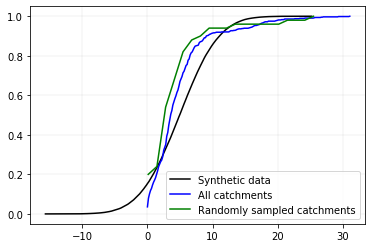

In [45]:
v0, b0 = np.histogram(np.random.normal(dStats[0], dStats[1],100000), bins=10000)
v1, b1 = np.histogram(d, bins=200)
v2, b2 = np.histogram(dRan, bins=20)
v0 = v0/np.max(v0)
v1 = v1/np.max(v1)
v2 = v2/np.max(v2)
c0 = np.cumsum(v0)
c1 = np.cumsum(v1)
c2 = np.cumsum(v2)

fig, axs = plt.subplots()
axs.plot(b0[:-1], c0/np.max(c0), c='k', label="Synthetic data")
axs.plot(b1[:-1], c1/c1[-1], c='blue', label="All catchments")
axs.plot(b2[:-1], c2/c2[-1], c='green', label="Randomly sampled catchments")
axs.grid(color='grey', linestyle='-', linewidth=0.1)
axs.legend()

### Use the Kolmogorov-Smirnov test to determine whether the Box-Cox transformed <runoff_ratio> variable is normally distributed. Plot the empirical and theoretical CDFs.

In [46]:
d_bc, _ = stats.boxcox(d - (np.min(d)-0.01))
stats.kstest(d_bc, 'norm')

KstestResult(statistic=0.5686971151670506, pvalue=4.5068192016878953e-197)

### plot the cumulative function

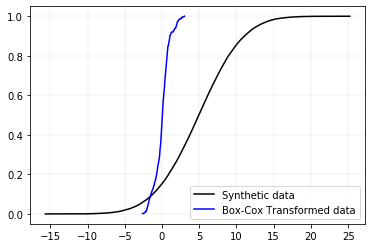

In [47]:
v1, b1 = np.histogram((d_bc - np.mean(d_bc))/np.std(d_bc), bins=200)
v1 = v1/np.max(v0)
v2 = v2/np.max(v0)
c1 = np.cumsum(v1)

fig, axs = plt.subplots()
axs.plot(b0[1:], c0/c0[-1], c='k', label="Synthetic data")
axs.plot(b1[1:], c1/c1[-1], c='blue', label="Box-Cox Transformed data")
axs.grid(color='grey', linestyle='-', linewidth=0.1)
axs.legend()

### test whether evergreen forests have different runoff ratios than other land cover types FROM HOMEWORK: a)  Is there a statistically significant difference between runoff ratios at forested sites vs. sites with other land cover types

In [48]:
vegClass = list(pd_data['dom_land_cover'])
#   land cover types? Why do you think this might be?
#FOREST CLASSES = 1, 2, 11 & 12
iForest = []
iNotForest = []
for i in range(0,Natt):
    if vegClass[i] in [1,2,11,12]:
        iForest.append(i)
    else:
        iNotForest.append(i)

rrForest = d[iForest]
rrNotForest = d[iNotForest]

### test whether the collecation of all forest-type land covers have a different mean

In [49]:
[h_Forest,p_Forest] = stats.ttest_ind(rrForest,rrNotForest)
#[h_Forest,p_Forest] = stats.f_oneway(rrForest,rrNotForest)

if h_Forest == 1:
    hyp_For = ' rejected'
else:
    hyp_For = ' not rejected'

print('Forest Stratification hypothesis is ', hyp_For, ', p value = ', str(p_Forest),'\n')

Forest Stratification hypothesis is   not rejected , p value =  1.816760916360256e-33 



### test whether all sedimentary geo types have a different mean FROM HOMEWORK: b)  Is there a statistically significant difference between runoff ratios at sites where the primary geological class is sedimentary vs. other classes? What about sites with unconsolidated sediments? Why do you think this might be? SEDIMENTARY CLASSES = 1, 4, 6, 7 & 8

In [50]:
geoClass = list(pd_data['geol_1st_class'])
iSed = []
iNotSed = []
iSed_u = []
iNotSed_u = []
for i in range(0,Natt):
    if geoClass[i] in [1,4,6,7,8]:
        iSed.append(i)
        # Unconsolidated sedimentary only (Geological class = 7)
        if geoClass[i] == 7:
            iSed_u.append(i)
        else:
            iNotSed_u.append(i)
    else:
        iNotSed.append(i)
        
rrSed = d[iSed]
rrNotSed = d[iNotSed]
[h_Sed,p_Sed] = stats.ttest_ind(rrSed,rrNotSed)
if h_Sed == 1:
    hyp_Sed = ' rejected'
else:
    hyp_Sed = ' not rejected'

print('Geological stratification hypothesis is ',hyp_Sed, ', p value = ',str(p_Sed),'\n')


#   Unconsolidated sedimentary only (Geological class = 7)
rrSed_u = d[iSed_u]
rrNotSed_u = d[iNotSed_u]
[h_Sed_u,p_Sed_u] = stats.ttest_ind(rrSed_u,rrNotSed_u)
if h_Sed_u == 1:
    hyp_Sed_u = ' rejected'
else:
    hyp_Sed_u = ' not rejected'

print('Unconsolidated sedimentary hypothesis is ',hyp_Sed_u,', p value = ',str(p_Sed_u),'\n')

Geological stratification hypothesis is   not rejected , p value =  1.526703719008295e-08 

Unconsolidated sedimentary hypothesis is   not rejected , p value =  0.0005324037120495303 

